In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the data set
train = pd.read_csv(r"C:\Users\Kavya\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\Kavya\Downloads\test.csv")
test_ids = test[['User_ID', 'Product_ID']].copy()

In [3]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
train.shape

(550068, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
train = train.drop_duplicates()

In [9]:
test.head(10)


,Comb,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004P00128942,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN
1,1000009P00113442,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010P00288442,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN
3,1000010P00145342,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN
4,1000011P00053842,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
5,1000013P00350442,1000013,P00350442,M,46-50,1,C,3,0,2,3.0,15.0
6,1000013P00155442,1000013,P00155442,M,46-50,1,C,3,0,1,11.0,15.0
7,1000013P0094542,1000013,P0094542,M,46-50,1,C,3,0,2,4.0,9.0
8,1000015P00161842,1000015,P00161842,M,26-35,7,A,1,0,10,13.0,16.0
9,1000022P00067942,1000022,P00067942,M,18-25,15,A,4+,0,5,14.0,NaN


In [10]:
test.shape

(233599, 12)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Comb                        233599 non-null  object 
 1   User_ID                     233599 non-null  int64  
 2   Product_ID                  233599 non-null  object 
 3   Gender                      233599 non-null  object 
 4   Age                         233599 non-null  object 
 5   Occupation                  233599 non-null  int64  
 6   City_Category               233599 non-null  object 
 7   Stay_In_Current_City_Years  233599 non-null  object 
 8   Marital_Status              233599 non-null  int64  
 9   Product_Category_1          233599 non-null  int64  
 10  Product_Category_2          161255 non-null  float64
 11  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 21.4+ MB


In [12]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.0,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.0,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.0,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.0,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.0,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.0,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,0.0,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,0.0,18.000000,18.000000,18.000000


In [13]:
test.isnull().sum()

Comb                               0
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [14]:
test = test.drop_duplicates()

In [15]:
# Handling missing values
train.fillna({'Product_Category_2': train['Product_Category_2'].mode()[0],
              'Product_Category_3': train['Product_Category_3'].mode()[0]}, inplace = True)

test.fillna({'Product_Category_2': test['Product_Category_2'].mode()[0],
             'Product_Category_3': test['Product_Category_3'].mode()[0]}, inplace = True)

In [16]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
test.isnull().sum()

Comb                          0
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

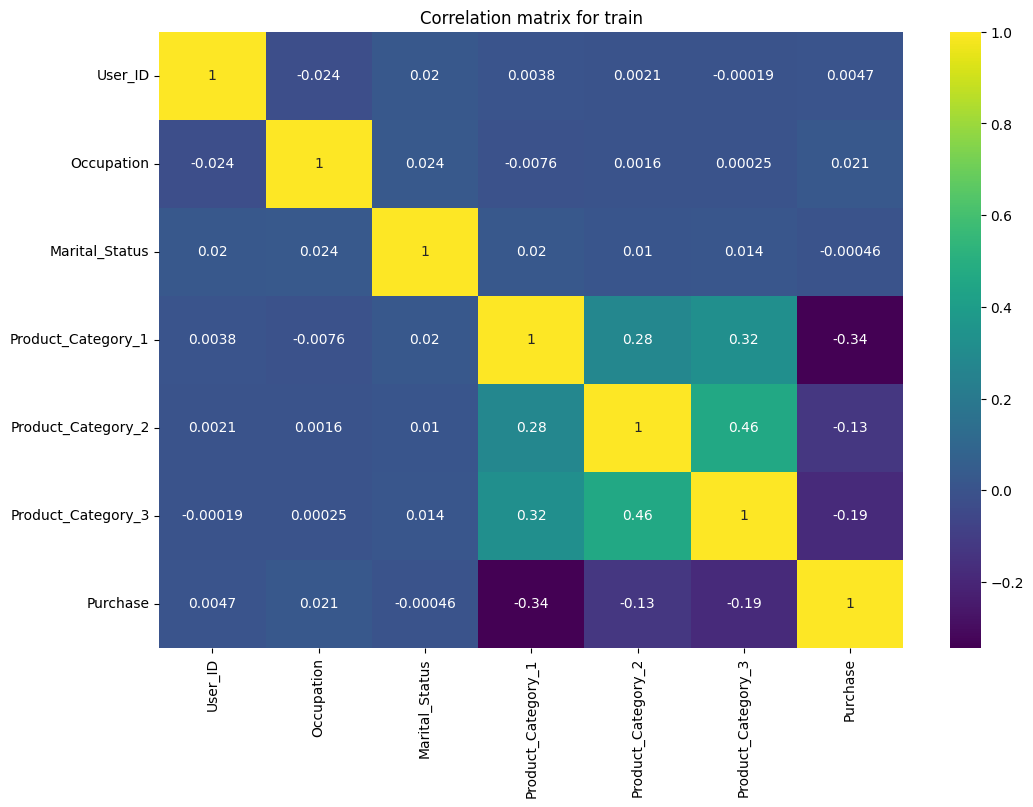

In [18]:
# Head map

plt.figure(figsize=(12,8))
sns.heatmap(train.corr(numeric_only = True), annot =True, cmap = "viridis")
plt.title("Correlation matrix for train")
plt.show()

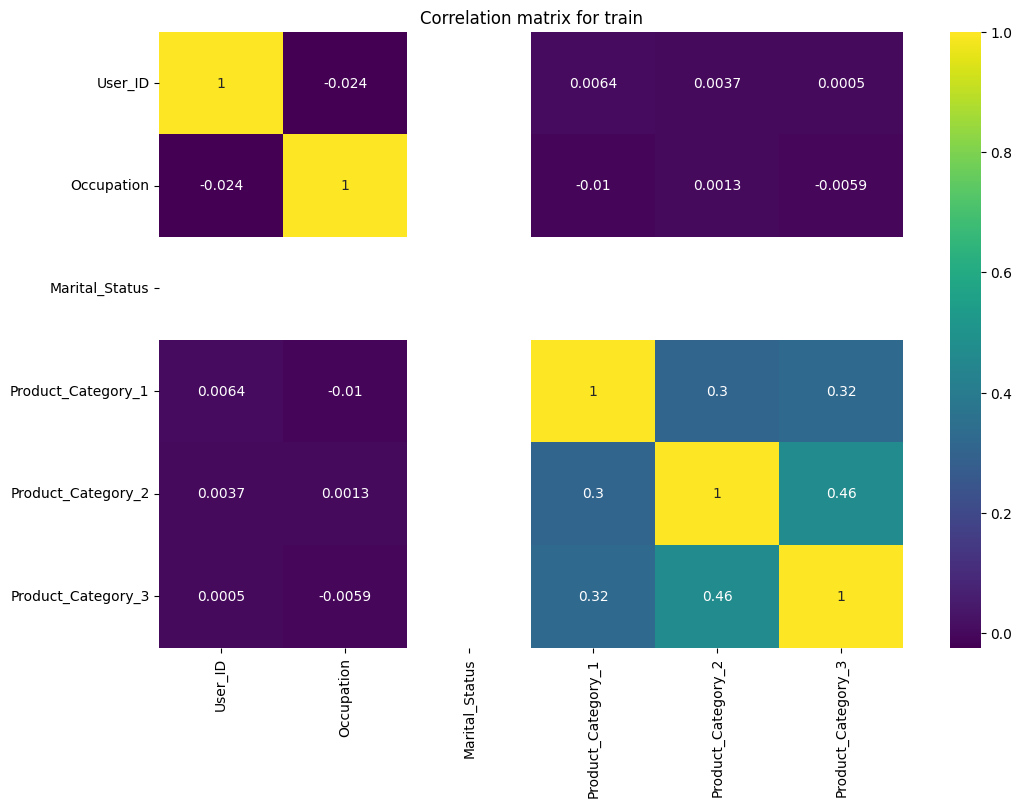

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(test.corr(numeric_only = True), annot =True, cmap = "viridis")
plt.title("Correlation matrix for train")
plt.show()

In [20]:
# Identify numerical and categorical columns
num_data = train.select_dtypes(include = "number")
cat_data = train.select_dtypes(include = "object")

num_cols = num_data.columns.tolist()
cat_cols = cat_data.columns.tolist()

print("Numerical columns", num_cols)
print("Categorical columns", cat_cols)

Numerical columns ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
Categorical columns ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [21]:
num_data1 = test.select_dtypes(include = "number")
cat_data1 = test.select_dtypes(include = "object")

num_cols1 = num_data1.columns.tolist()
cat_cols1 = cat_data1.columns.tolist()

print("Numerical columns", num_cols1)
print("Categorical columns", cat_cols1)

Numerical columns ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
Categorical columns ['Comb', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


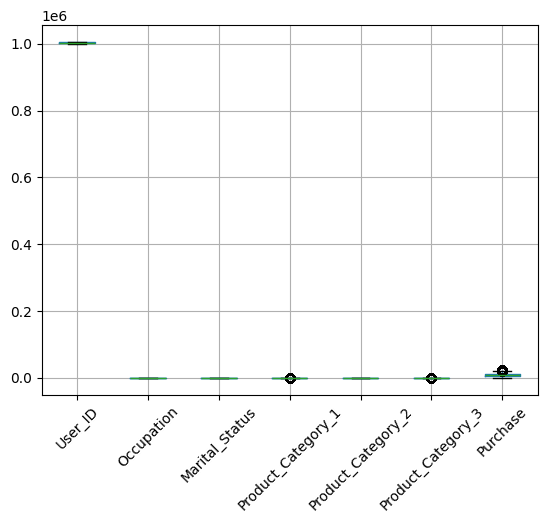

In [22]:
# Perform Outlier detection 
num_data.boxplot()
plt.xticks(rotation = 45)
plt.show()

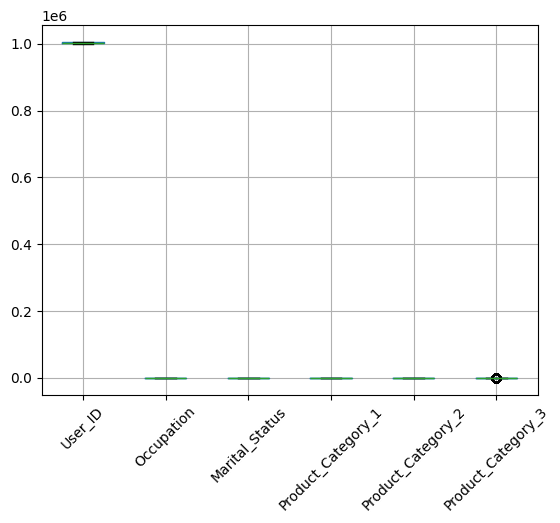

In [23]:
num_data1.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [24]:
# Outlier handling
def remove_outliers(train, column_name):
    Q1 = train[column_name].quantile(0.25)
    Q3 = train[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    train[column_name] = train[column_name].clip(upper = upper_bound)
    train[column_name] = train[column_name].clip(lower = lower_bound)
    return train[column_name]
for col in num_cols:
      num_data[col] = remove_outliers(num_data, col)

In [25]:
def remove_outliers_test(test, column_name):
    Q1 = test[column_name].quantile(0.25)
    Q3 = test[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    test[column_name] = test[column_name].clip(upper = upper_bound)
    test[column_name] = test[column_name].clip(lower = lower_bound)
    return train[column_name]
for col in num_cols1:
      num_data1[col] = remove_outliers(num_data1, col)

In [26]:
X = train.drop(['User_ID','Product_ID','Purchase'], axis = 1)
y = train['Purchase']
X_test = test.drop(['User_ID','Product_ID'], axis = 1)

In [27]:
# Encode categorical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder
Categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

for col in Categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    X_test[col]= le.transform(test[col].astype(str))

In [29]:
# Train test split for validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Models




In [30]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random forest": RandomForestRegressor(n_estimators=100, random_state=42)
}


In [32]:
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
model_scores = {}
for name, model in models.items(): 
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_scores[name] = {"MSE": mse, "R2": r2}

    print(f"\n{name}:")
    print(f"Mean Squared Error = {mse:.4f}")
    print(f"R Squared Value   = {r2:.4f}")



Linear Regression:
Mean Squared Error = 21857326.2344
R Squared Value   = 0.1301

Lasso Regression:
Mean Squared Error = 21857326.2497
R Squared Value   = 0.1301

Random forest:
Mean Squared Error = 9312820.0172
R Squared Value   = 0.6294


In [36]:
# Select best model based on MSE
best_model_name = min(model_scores, key=lambda x: model_scores[x]["MSE"])
best_model = models[best_model_name]

# Print best model with MSE and R²
print(f"\nBest model: {best_model_name} with MSE={model_scores[best_model_name]['MSE']:.2f} and R²={model_scores[best_model_name]['R2']:.2f}")

# Retrain best model on full training data
best_model.fit(X, y)


Best model: Random forest with MSE=9312820.02 and R²=0.63


RandomForestRegressor(random_state=42)

In [38]:
X_test = test.drop(['User_ID', 'Product_ID'], axis=1)

In [40]:
test_preds = best_model.predict(X_test)

submission = pd.DataFrame({
    'Purchase': test_preds,
    'User_ID': test['User_ID'],
    'Product_ID': test['Product_ID']
})

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Comb


In [ ]:
submission = submission[['Purchase','User_ID','Product_ID']]

submission.to_csv('submission_best_model.csv', index=False)
print("\nSaved: submission_best_model.csv")